In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

DDA(데이터 정의 분석) 및 EDA(탐색적 데이터 분석)에 대한 연습문제
데이터셋: Titanic 데이터셋의 일부 (열: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)

I. DDA(데이터 정의 분석) 연습문제
    
    1. 데이터 구조 및 열 정의

       # 각 열의 데이터 유형을 파악하시오.
       # 다음 질문에 답하시오:
            Survived 열은 어떤 값을 나타내는가? number 형태로(0,1) 생존자와 사망자 구별
            Pclass 열의 범주는 무엇을 의미하는가? number 형태로(1,2,3) 객실의 등급
    
    2. 결측치 확인

        # 데이터셋에서 결측치가 있는 열을 모두 나열하시오. Age, Cabin, Embarked
        # 각 열의 결측치 개수를 계산하시오. Age = 177개 , Cabin = 687개 , Embarked = 2개

In [55]:
import pandas as pd
df_titanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


    3. 기초 통계량 계산

        # 수치형 열(Age, Fare)의 평균, 중앙값, 최댓값, 최솟값, 표준편차를 구하시오.
        
        ## Age : 평균 = 29.699118 , 중앙값 = 28.0, 최대값 = 80.000000 , 최솟값 = 0.420000 , 표준편차 = 14.526497
        ## Fare : 평균 = 32.204208 , 중앙값 = 14.4542, 최대값 = 512.329200 , 최솟값 = 0.000000 , 표준편차 = 49.693429
        
        # 범주형 열(Sex, Embarked)의 고유값(unique values)과 각 값의 빈도를 구하시오.

        ## Sex : 고유값 = 2 , 빈도 = 577
        ## Embarked : 고유값 = 3 , 빈도 = 644

In [57]:
df_titanic.describe(include='all')
df_titanic[['Age']].median()
df_titanic[['Fare']].median()

Fare    14.4542
dtype: float64

II. EDA(탐색적 데이터 분석) 연습문제
    
    1. 생존 여부 분석

        # Survived 열의 값(0과 1)의 빈도를 막대 그래프로 시각화하시오.
        # 생존자 비율을 계산하시오.
            0(사망) = 549/891 = 0.616161... = 61%
            1(생존) = 342/891 = 0.383838... = 38%

Survived
0    549
1    342
Name: count, dtype: int64

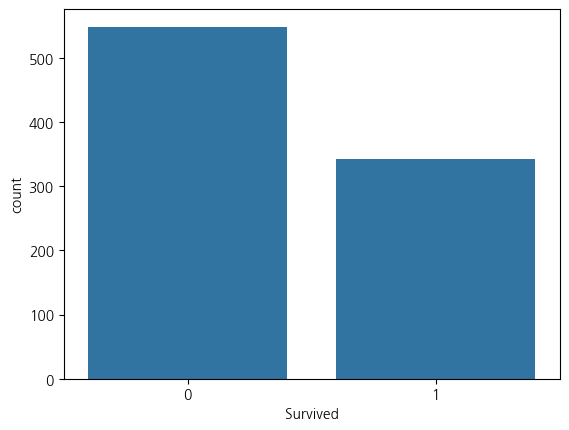

In [58]:
sns.countplot(data = df_titanic, x = 'Survived')
df_titanic['Survived'].value_counts()

    2. 성별에 따른 생존율 분석

        # 성별(Sex)에 따라 생존자와 사망자의 분포를 막대 그래프로 나타내시오.
        # 각 성별의 생존율(생존자 비율)을 계산하시오.

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

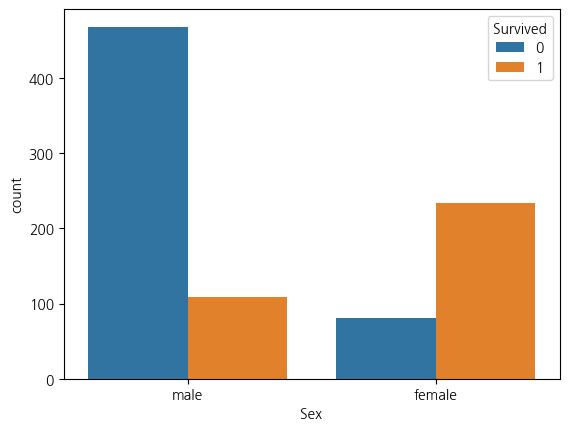

In [59]:
df_titanic.Sex.info()
sns.countplot(data = df_titanic, x = 'Sex' , hue = 'Survived'  )

survive_rate = df_titanic.groupby('Sex')['Survived'].mean()
survive_rate

    3. 객실 등급(Pclass) 분석

        # 객실 등급(Pclass)별 생존율을 계산하시오.
        # 객실 등급에 따른 생존자 수와 사망자 수를 비교하는 스택형 막대 그래프를 작성하시오.

<Axes: xlabel='Pclass', ylabel='count'>

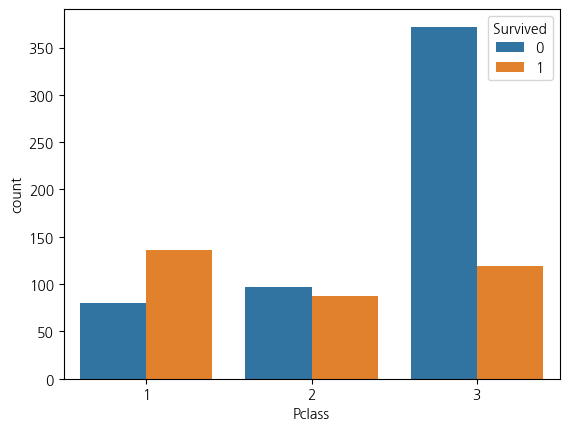

In [60]:
pclass_survived_rate = df_titanic.groupby('Pclass')['Survived'].mean()
pclass_survived_rate

sns.countplot(data = df_titanic , x = 'Pclass', hue = 'Survived')

    4. 요금(Fare) 분포

        # 요금(Fare)의 분포를 히스토그램으로 나타내시오.
        # 요금 분포에서 이상치를 확인하고 이상치가 무엇인지 설명하시오.
            비이상적으로 높은 값을 의미

<Axes: xlabel='Fare', ylabel='Count'>

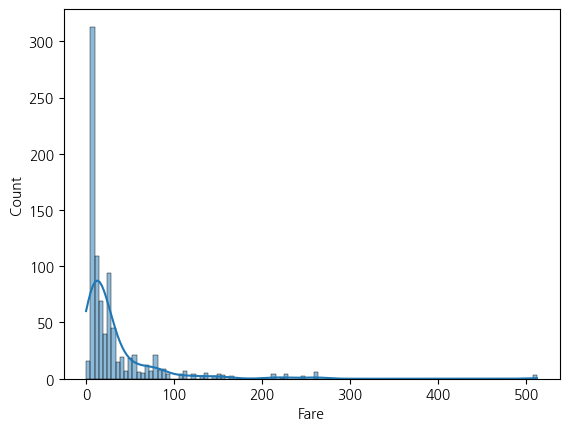

In [61]:
sns.histplot(data = df_titanic, x = 'Fare', kde = True)

    5. 탑승 항구(Embarked) 분석

      # 각 탑승 항구(Embarked)에서 탑승한 승객의 수를 파악하시오.
      # 각 항구별 생존율을 계산하시오.

In [62]:
df_titanic['Embarked'].fillna('50%')
embarked_titanic = pd.pivot_table(data = df_titanic, index='Passengerld', values='Embarked', aggfunc = 'sum')
embarked_titanic

KeyError: 'Passengerld'

    6. 연령(Age) 분석

        # 연령 분포를 밀도 차트로 나타내시오.
        # 생존자와 사망자의 연령 분포를 비교하시오.

III. 심화 문제
    1. 가족 여부 분석

        # SibSp(형제/자매/배우자 수)와 Parch(부모/자녀 수)를 이용해 승객이 혼자인지 또는 가족과 함께인지 확인하는 새로운 열(IsAlone)을 추가하시오.
        # 가족 여부(IsAlone)에 따른 생존율을 계산하고 시각화하시오.

    2. 요인 간 상관관계 분석

        # 생존 여부(Survived)와 객실 등급(Pclass), 성별(Sex), 연령(Age) 간의 상관관계를 파악하시오.
        # 히트맵을 활용해 주요 요인 간의 상관관계를 시각화하시오.